# EDA-Netflix

## Import Library
import library yang dibutuhkan


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import btext as bt
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS

from collections import Counter


In [2]:
print(np.__version__)
print(pd.__version__)

1.20.0
1.2.2


## Load Data
Data yang digunakan berasal dari Kaggle.com dalam bentuk CSV. Kemudian ditampilkan secara keseluruhan. CSV yang di read ditampung dalam variable df

In [3]:
df=pd.read_csv('netflix_titles.csv')
df


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


## EDA

### Tipe Data
menggunakan df.dtypes untuk melihat tipe data dari setiap kolom yang ada pada dataset

In [4]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

### Dimensi
Dengan menggunakan df.shape, melihat dimensi dari dataset. Dataset memiliki 7787 baris dan 12 kolom

In [5]:
df.shape

(7787, 12)

## EDA - Data Cleaning
Data cleaning bertujuan agar dataset yang akan kita gunakan sudah bersih dari nilai null. Sehingga, eksplorasi akan menampilkan hasil yang lebih baik.

### Menghitung Nilai Null
dengan menggunakan .isna() digunakan untuk mendeteksi nilai dari setiap cell yang null. Jika cell berisi tulisan 'kosong' = tidak null

In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

### Drop Baris Null
Dengan menggunakan dropna() akan menghapus setiap baris yang mengandung nilai null. jika ingin menghapus kolom, gunakan .dropna(axis='column')

In [7]:
df = df.dropna(axis='rows')

In [8]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Dimensi Dataset
setelah dibersihkan dimensi dataset menjadi 4808 baris dan 12 kolom

In [9]:
df.shape

(4808, 12)

In [10]:
df.count()

show_id         4808
type            4808
title           4808
director        4808
cast            4808
country         4808
date_added      4808
release_year    4808
rating          4808
duration        4808
listed_in       4808
description     4808
dtype: int64

In [11]:
df.release_year.max()

2021

In [12]:
df.release_year.min()

1942

In [13]:
df['release_year'].value_counts()

2017    645
2018    624
2016    562
2019    488
2020    379
       ... 
1966      1
1942      1
1945      1
1964      1
1946      1
Name: release_year, Length: 71, dtype: int64

In [14]:
# df['release_year'].isin([2021]).value_counts()

In [15]:
# th2021 = df[df['release_year'] == 2021 ].index
# df.drop(th2021, inplace=True)

In [16]:
# df['release_year'].isin([2021]).value_counts()

In [17]:
# df['release_year'].value_counts()

In [18]:
df.loc[df['release_year']==2021]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1285,s1286,Movie,Charming,Ross Venokur,"Wilmer Valderrama, Demi Lovato, Sia, Nia Varda...","Canada, United States, Cayman Islands","January 8, 2021",2021,TV-Y7,85 min,"Children & Family Movies, Comedies","On the eve of his 21st birthday, an adored pri..."
6477,s6478,TV Show,The Idhun Chronicles,Maite Ruiz De Austri,"Michelle Jenner, Itzan Escamilla, Sergio Mur, ...",Spain,"January 8, 2021",2021,TV-14,2 Seasons,"Anime Series, International TV Shows, Spanish-...",A boy suddenly orphaned fights his parents' ki...
7551,s7552,Movie,What Happened to Mr. Cha?,Kim Dong-kyu,"Cha In-pyo, Cho Dal-hwan, Song Jae-ryong",South Korea,"January 1, 2021",2021,TV-MA,102 min,"Comedies, International Movies","With the peak of his career long behind him, a..."
7569,s7570,Movie,What Would Sophia Loren Do?,Ross Kauffman,"Nancy ""Vincenza Careri"" Kulik, Sophia Loren",United States,"January 15, 2021",2021,TV-14,32 min,Documentaries,"In this delightful short documentary, an Itali..."


In [19]:
df.date_added = pd.to_datetime(df.date_added)


C:\Users\acer\Anaconda3\lib\site-packages\pandas\core\generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [20]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [21]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...


In [22]:
df.loc[df['date_added'].dt.year == 2021]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
57,s58,Movie,100% Halal,Jastis Arimba,"Anisa Rahma, Ariyo Wahab, Anandito Dwis, Fitri...",Indonesia,2021-01-07,2020,TV-14,101 min,"Dramas, International Movies","After high school, a young woman marries the m..."
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,2021-01-01,2009,PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik..."
104,s105,Movie,30 Minutes or Less,Ruben Fleischer,"Jesse Eisenberg, Danny McBride, Aziz Ansari, N...",United States,2021-01-01,2011,R,83 min,"Action & Adventure, Comedies",Two crooks planning a bank heist wind up abduc...
205,s206,Movie,A Monster Calls,J.A. Bayona,"Lewis MacDougall, Sigourney Weaver, Felicity J...","United Kingdom, Spain, United States",2021-01-16,2016,PG-13,108 min,"Dramas, Sci-Fi & Fantasy","Overwhelmed by his mother’s illness, a young b..."
493,s494,Movie,An Imperfect Murder,James Toback,"Sienna Miller, Alec Baldwin, Charles Grodin, C...",United States,2021-01-13,2017,R,71 min,"Dramas, Thrillers",Haunted by a nightmare involving her abusive e...
...,...,...,...,...,...,...,...,...,...,...,...,...
7145,s7146,Movie,Tony Parker: The Final Shot,Florent Bodin,Tony Parker,France,2021-01-06,2020,TV-14,99 min,"Documentaries, International Movies, Sports Mo...",This film examines the background and career o...
7351,s7352,Movie,Unknown,Jaume Collet-Serra,"Liam Neeson, Diane Kruger, January Jones, Aida...","United Kingdom, Germany, France, United States",2021-01-01,2011,PG-13,113 min,"Action & Adventure, Thrillers",Liam Neeson stars as a man who regains conscio...
7551,s7552,Movie,What Happened to Mr. Cha?,Kim Dong-kyu,"Cha In-pyo, Cho Dal-hwan, Song Jae-ryong",South Korea,2021-01-01,2021,TV-MA,102 min,"Comedies, International Movies","With the peak of his career long behind him, a..."
7569,s7570,Movie,What Would Sophia Loren Do?,Ross Kauffman,"Nancy ""Vincenza Careri"" Kulik, Sophia Loren",United States,2021-01-15,2021,TV-14,32 min,Documentaries,"In this delightful short documentary, an Itali..."


In [23]:
th2021_da = df[df['date_added'].dt.year == 2021].index
df.drop(th2021_da, inplace=True)


C:\Users\acer\Anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
(df['date_added'].dt.year == 2021).value_counts()

False    4730
Name: date_added, dtype: int64

In [25]:
df.loc[df['date_added'].dt.year == 2021]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


### Membatasi Data 5 Tahun Terakhir
data tahun yang diambil adalah tahun ditambahkannya film atau TV show tersebut ke Netflix, maksimal di 2020

In [26]:
fiveyearadded = df.loc[df['date_added'].dt.year > 2015]
fiveyearadded


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
...,...,...,...,...,...,...,...,...,...,...,...,...
7778,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,2018-07-01,2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...


### Memastikan Tahun
memastikan data hanya sampai 2020, release year sudah pasti tidak ada yang 2021 karena tidak mungkin film rilis 2021 ditambahkan di Netflix tahun 2020

In [47]:
fiveyearadded.loc[df['release_year'] == 2021]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [48]:
fiveyearadded.loc[df['date_added'] == 2021]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [27]:
fiveyearadded['date_added']=fiveyearadded['date_added'].dt.year
fiveyearadded.head()

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...


### Jumlah Tiap Tahun Berdasarkan date_added

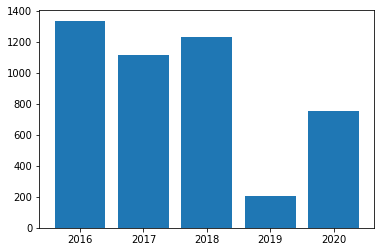

In [28]:
label = fiveyearadded['date_added'].unique()
jmlh = fiveyearadded['date_added'].value_counts()
plt.bar(label, jmlh)
plt.show()

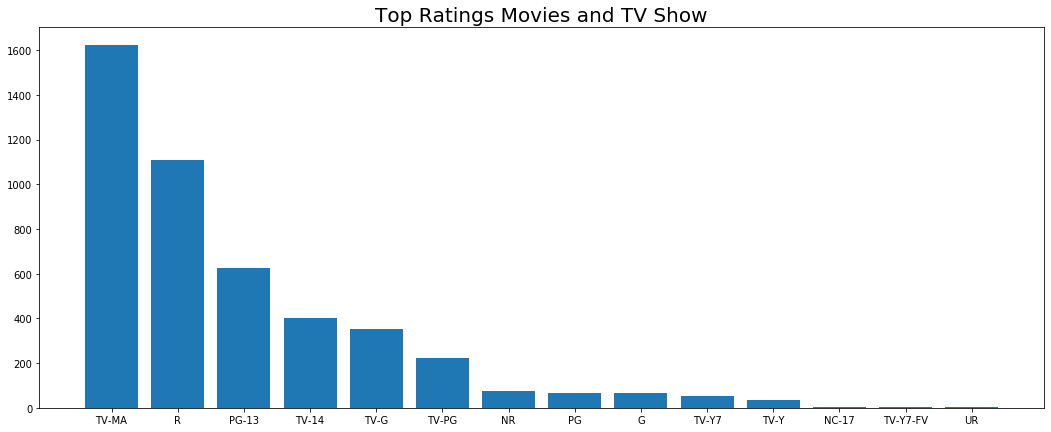

In [29]:
# top_ratings = df.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_size = (18,7)
fig, ax = plt.subplots(figsize=fig_size)  
# sb.pointplot(x='rating',y='count',data=top_ratings)
plt.bar(fiveyearadded['rating'].unique(), fiveyearadded['rating'].value_counts())
plt.title('Top Ratings Movies and TV Show',size='20')
plt.show()

In [30]:
netflix_movies = fiveyearadded.loc[df['type'] == 'Movie']
netflix_tvshow = fiveyearadded.loc[df['type'] == 'TV Show']

netflix_movies.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


In [31]:
netflix_tvshow.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
132,s133,TV Show,7 (Seven),Nizar Shafi,"Rahman, Havish, Regina Cassandra, Nandita Swet...",India,2019,2019,TV-14,1 Season,TV Shows,Multiple women report their husbands as missin...
218,s219,TV Show,A Queen Is Born,Carla Barros,"Gloria Groove, Alexia Twister",Brazil,2020,2020,TV-14,1 Season,"International TV Shows, Reality TV",Gloria Groove and Alexia Twister make drag dre...
260,s261,TV Show,A.I.C.O.,Kazuya Murata,"Haruka Shiraishi, Yusuke Kobayashi, Makoto Fur...",Japan,2018,2018,TV-14,1 Season,"Anime Series, International TV Shows",Everything Aiko knew was a lie. Now she's join...
276,s277,TV Show,Abby Hatcher,Kyran Kelly,"Macy Drouin, Wyatt White, Paul Sun-Hyung Lee, ...","United States, Canada",2020,2019,TV-Y,1 Season,Kids' TV,A big-hearted girl helps her Fuzzly friends wh...


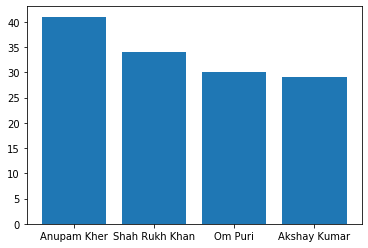

In [32]:
def pisah(cols) :
    temp = []
    for i in list(cols) :
        for j in i.split(',') :
            temp.append(bt.conslet(j))
    return temp

most_common_cast = Counter(pisah(netflix_movies['cast'])).most_common(4)

labls = [i[0] for i in most_common_cast]
jml = [i[1] for i in most_common_cast]
plt.bar(labls, jml)
plt.show()

In [54]:
Counter(pisah(netflix_movies['cast'])).most_common()

[('Anupam Kher', 41),
 ('Shah Rukh Khan', 34),
 ('Om Puri', 30),
 ('Akshay Kumar', 29),
 ('Naseeruddin Shah', 28),
 ('Amitabh Bachchan', 27),
 ('Paresh Rawal', 27),
 ('Boman Irani', 26),
 ('Kareena Kapoor', 25),
 ('Kay Kay Menon', 19),
 ('Salman Khan', 19),
 ('Ajay Devgn', 19),
 ('Nicolas Cage', 19),
 ('Adam Sandler', 18),
 ('Anil Kapoor', 18),
 ('Samuel L Jackson', 17),
 ('Gulshan Grover', 17),
 ('James Franco', 17),
 ('Asrani', 17),
 ('Nawazuddin Siddiqui', 17),
 ('Saif Ali Khan', 16),
 ('Rajpal Yadav', 16),
 ('Amrish Puri', 16),
 ('John Cleese', 16),
 ('Manoj Joshi', 16),
 ('Priyanka Chopra', 15),
 ('Jackie Shroff', 15),
 ('Manoj Bajpayee', 15),
 ('Katrina Kaif', 15),
 ('Rajesh Sharma', 15),
 ('Adil Hussain', 14),
 ('Danny Trejo', 14),
 ('Sachin Khedekar', 14),
 ('Yashpal Sharma', 14),
 ('Tinnu Anand', 14),
 ('Sanjay Mishra', 14),
 ('Sanjay Dutt', 14),
 ('Vijay Raaz', 14),
 ('Pavan Malhotra', 14),
 ('Sharat Saxena', 14),
 ('Morgan Freeman', 13),
 ('Alfred Molina', 13),
 ('Molly Shan

In [59]:
set(pisah(netflix_movies['listed_in']))

{'Action Adventure',
 'Anime Features',
 'Children Family Movies',
 'Classic Movies',
 'Comedies',
 'Cult Movies',
 'Documentaries',
 'Dramas',
 'Faith Spirituality',
 'Horror Movies',
 'Independent Movies',
 'International Movies',
 'LGBTQ Movies',
 'Movies',
 'Music Musicals',
 'Romantic Movies',
 'Sci Fi Fantasy',
 'Sports Movies',
 'Stand Up Comedy',
 'Thrillers'}

In [61]:
Counter(pisah(netflix_movies['listed_in'])).most_common()

[('International Movies', 2151),
 ('Dramas', 1977),
 ('Comedies', 1353),
 ('Action Adventure', 678),
 ('Independent Movies', 650)]

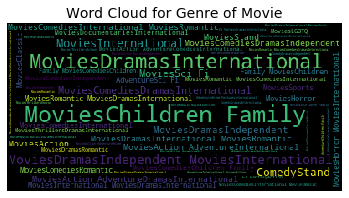

In [65]:
text1 = ''.join(pisah(netflix_movies['listed_in']))
# text3
wordcloud = WordCloud().generate(text1)
# Generate plot
plt.imshow(wordcloud)

plt.axis("off")
plt.title('Word Cloud for Genre of Movie',size='14')
plt.show()

In [53]:
pd.DataFrame(netflix_movies['country'].value_counts())

,country
United States,1523
India,816
United Kingdom,154
Canada,98
Egypt,87
...,...
"Lebanon, France",1
"United States, France, United Kingdom, Japan",1
"South Africa, Nigeria",1
"Paraguay, Argentina",1


In [34]:
netflix_movies['duration'] = netflix_movies['duration'].str.split(' ').str[0]
mov_dur = netflix_movies['duration'].astype(int)

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


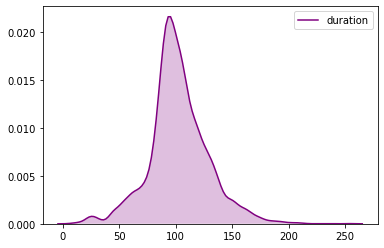

In [35]:

sns.kdeplot(data=mov_dur, shade=True, color= 'purple' )

In [36]:
mov_dur.describe()

count    4511.000000
mean      102.617158
std        26.330653
min         8.000000
25%        89.000000
50%       100.000000
75%       117.000000
max       253.000000
Name: duration, dtype: float64

In [37]:
netflix_movies.loc[netflix_movies['duration'] == '253']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6850,s6851,Movie,The School of Mischief,Houssam El-Din Mustafa,"Suhair El-Babili, Adel Emam, Saeed Saleh, Youn...",Egypt,2020,1973,TV-14,253,"Comedies, Dramas, International Movies",A high school teacher volunteers to transform ...


C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


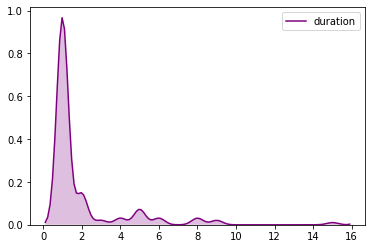

In [38]:
netflix_tvshow['duration'] = netflix_tvshow['duration'].str.split(' ').str[0]
tv_dur = netflix_tvshow['duration'].astype(int)
sns.kdeplot(data=tv_dur, shade=True, color= 'purple' )

In [39]:
tv_dur.describe()

count    128.000000
mean       1.945312
std        2.160157
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       15.000000
Name: duration, dtype: float64

In [40]:
netflix_tvshow.loc[netflix_tvshow['duration'] == '15']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5912,s5913,TV Show,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...","United States, Canada",2020,2019,TV-14,15,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ..."


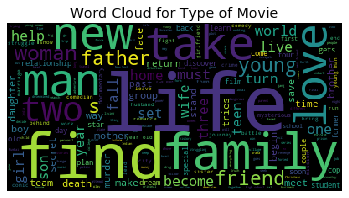

In [41]:
text3 = ', '.join(fiveyearadded['description'])
# text3
wordcloud = WordCloud().generate(text3)
# Generate plot
plt.imshow(wordcloud)

plt.axis("off")
plt.title('Word Cloud for Type of Movie',size='14')
plt.show()


In [43]:
unique_genre = set()
for i in netflix_movies['listed_in'] :
    for x in bt.conslet_tokenized(i, sep = ',') :
        unique_genre.add(x)
# unique_genre
pd.DataFrame(unique_genre)

,0
0,Action Adventure
1,Sci Fi Fantasy
2,LGBTQ Movies
3,Stand Up Comedy
4,Classic Movies
5,Cult Movies
6,Sports Movies
7,Thrillers
8,Dramas
9,Horror Movies


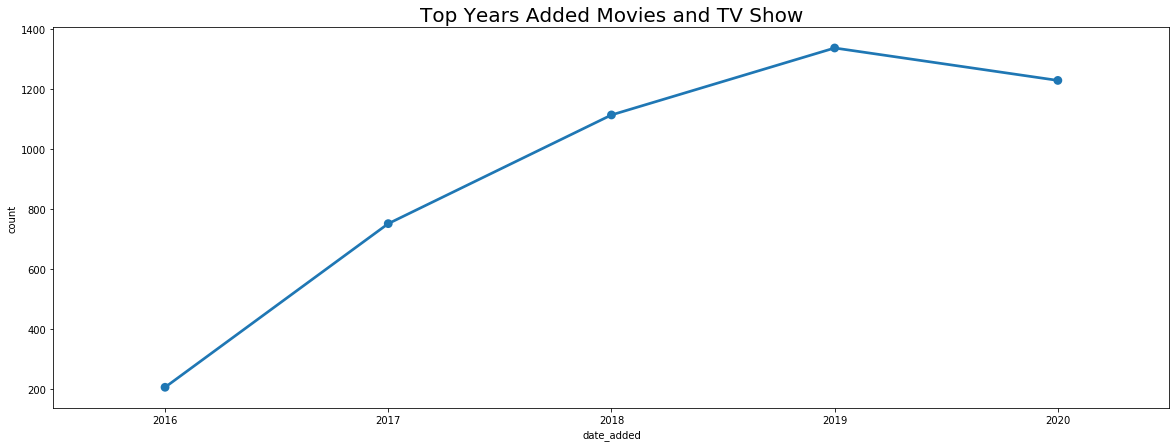

In [44]:
# recent_5yrsA = fiveyearadded[fiveyearadded.date_added > 2015]
top_yearsA = fiveyearadded.groupby(['date_added'])['show_id'].count().reset_index(name='count').sort_values(by='count')
fig_size = (20,7)
fig, ax = plt.subplots(figsize=fig_size)  
sns.pointplot(x='date_added',y='count',data=top_yearsA)

plt.title('Top Years Added Movies and TV Show',size='20')
plt.show()